#**Технологии кластерного анализа данных**

# **1. Подготовка исходных данных**

Прочитать файл с исходными данными и записать его в таблицу.

In [24]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl


In [25]:
df = pd.read_csv("22.csv", header = None)
df.columns=['x','y']

In [26]:
df.head(5)

,x,y
0,9.082147,-3.925139
1,-1.588040,-8.521565
2,5.960140,-7.272097
3,-0.331278,12.828355
4,5.805702,9.999897


In [27]:
df.isnull().sum()

,0
x,0
y,0


In [28]:
df.duplicated().sum()

0

Построить диаграмму рассеяния.

Text(0, 0.5, 'Ось y')

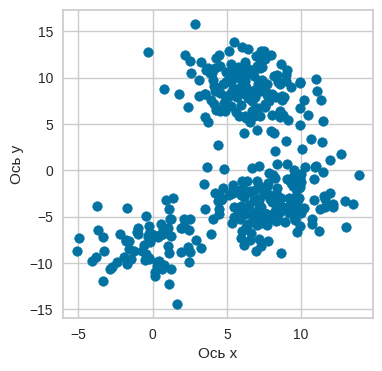

In [29]:
plt.figure(figsize = (4,4))
plt.scatter(df['x'],df['y'])
plt.xlabel('Ось x')
plt.ylabel('Ось y')

Произвести масштабирование значений признаков.

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
df_m = pd.DataFrame(scaler.transform(df), columns = df.columns)
df_m.head()

,x,y
0,0.747414,0.346583
1,0.185421,0.194545
2,0.582979,0.235874
3,0.251614,0.900744
4,0.574845,0.807186


Text(0, 0.5, 'Ось y')

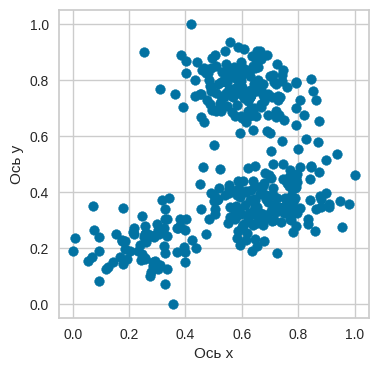

In [31]:
plt.figure(figsize = (4,4))
plt.scatter(df_m['x'],df_m['y'])
plt.xlabel('Ось x')
plt.ylabel('Ось y')

# **2. Кластеризация с использованием алгоритма k_средних**

Для выполнения заданий использовать библиотеки `sklearn` и `yellowbrick`.

Определить количество кластеров с использованием методов локтя и силуэта.


In [32]:
from sklearn.cluster import KMeans
wcss = []

for j in range (1,10):
  kmeans = (KMeans(n_clusters = j, init  = 'k-means++', n_init = 'auto', max_iter = 300, random_state=42))
  kmeans.fit(df_m)
  wcss.append(kmeans.inertia_)
  print('Кластеров:', j,'инерция', wcss[j-1])

Кластеров: 1 инерция 38.177122715649816
Кластеров: 2 инерция 20.39663263605184
Кластеров: 3 инерция 7.206585366913595
Кластеров: 4 инерция 5.985077824807321
Кластеров: 5 инерция 5.356719582390964
Кластеров: 6 инерция 5.023687540518976
Кластеров: 7 инерция 3.5662424470198375
Кластеров: 8 инерция 3.155575807709326
Кластеров: 9 инерция 2.8670632942553422


Text(0, 0.5, 'Инерция')

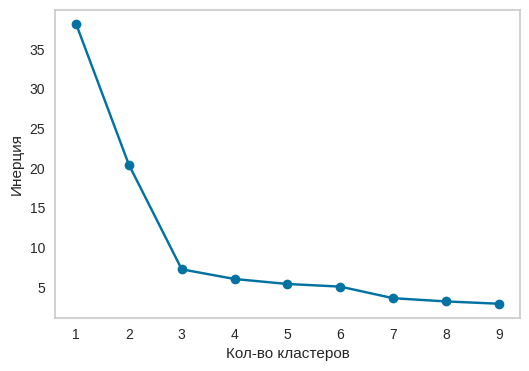

In [33]:
plt.figure(figsize = (6,4))
plt.plot(range(1,10),wcss, marker = 'o')
plt.grid()
plt.xlabel("Кол-во кластеров")
plt.ylabel('Инерция')

In [34]:
for i in range (1, len(wcss)-1):
  D = abs(wcss[i]-wcss[i+1]/abs(wcss[i-1]-wcss[i]))
  print(i+1,D)

2 19.991324045869465
3 6.7528282496960506
4 1.5997429842591853
5 2.638222158486572
6 5.6847188547750935
7 1.4011002939571835
8 3.8259099518084074


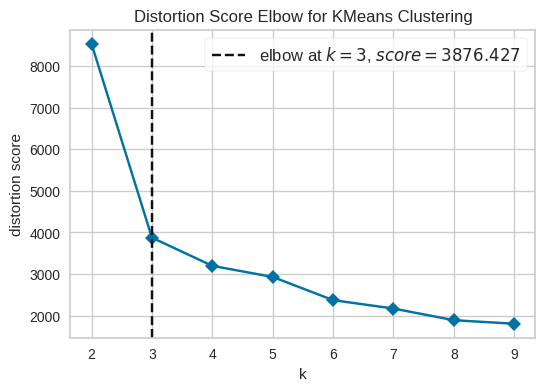

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
plt.figure(figsize = (6,4))
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans, k = (2,10), timings = False)
visualizer.fit(df)
visualizer.show()

Обучить модель кластеризации.

In [36]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',algorithm = 'lloyd',n_init=4, random_state = 42)
kmeans.fit(df_m)

KMeans(n_clusters=3, n_init=4, random_state=42)

In [37]:
kmeans.labels_

array([0, 2, 0, 1, 1, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 2, 1, 1, 2, 2,
       2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2,
       0, 2, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0,
       2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0,
       1, 1, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1,
       2, 1, 1, 1, 0, 1, 0, 1, 2, 1, 0, 2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1,
       1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1,
       2, 1, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1, 2, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 0,
       0, 0, 2, 1, 0, 2, 0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       2, 1, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 2,
       1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 0, 2, 0, 2, 2,

Построить таблицу с исходными значениями признаков и номерами кластеров для каждого объекта.

In [38]:
dfc = df.copy()
dfc['Кластер'] = kmeans.labels_
dfc.head()

,x,y,Кластер
0,9.082147,-3.925139,0
1,-1.588040,-8.521565,2
2,5.960140,-7.272097,0
3,-0.331278,12.828355,1
4,5.805702,9.999897,1


In [39]:
kmeans.cluster_centers_

array([[0.69844852, 0.37122047],
       [0.60040981, 0.77242296],
       [0.26278144, 0.21762694]])

Построить диаграмму рассеяния и отобразить цветами полученные кластеры.

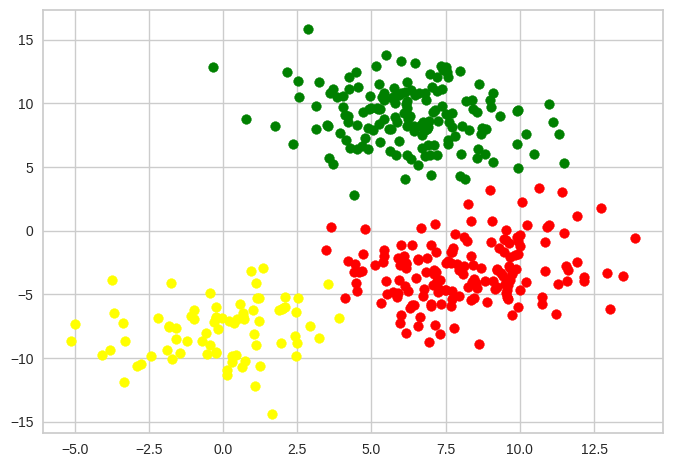

In [40]:
colors = ['red','green','yellow']
for i in range (len(kmeans.labels_)):
  plt.scatter(dfc['x'].loc[i],
              dfc['y'].loc[i],
              color = colors[kmeans.labels_[i]])

Описать полученные кластеры:
- построить таблицу, содержащую средние значения признаков в каждом кластере;
- построить диаграммы boxplot для всех признаков, разделенных по кластерам.


In [42]:
df_segm = dfc.groupby(['Кластер']).median()
df_segm

,x,y
Кластер,,
0,8.013156,-3.248694
1,6.301879,8.978256
2,0.138847,-7.512954


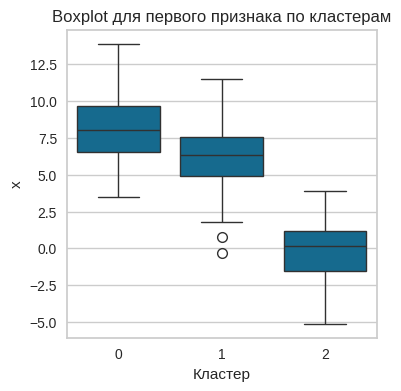

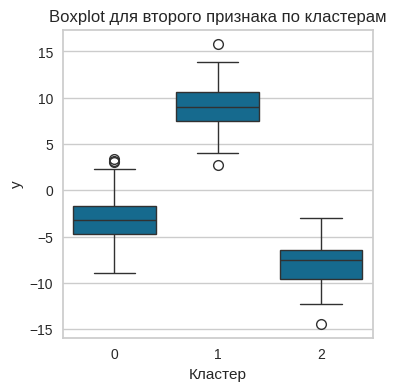

In [55]:
import seaborn as sns

plt.figure(figsize=(4,4))
sns.boxplot(x='Кластер', y=dfc.columns[0], data=dfc)
plt.title('Boxplot для первого признака по кластерам')
plt.show()

plt.figure(figsize=(4,4))
sns.boxplot(x='Кластер', y=dfc.columns[1], data=dfc)
plt.title('Boxplot для второго признака по кластерам')
plt.show()

# **3. Кластеризация с использованием иерархического агломеративного алгоритма**

Для выполнения заданий использовать библиотеки `scipy` и `yellowbrick`.

Построить и вывести матрицу связностей (расстояний).


In [44]:
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
np.set_printoptions(suppress=True)

link = linkage(df_m,'ward','euclidean')
link[:5]

array([[314.        , 375.        ,   0.00221524,   2.        ],
       [ 24.        , 265.        ,   0.00231674,   2.        ],
       [200.        , 232.        ,   0.00250113,   2.        ],
       [ 96.        , 163.        ,   0.00257373,   2.        ],
       [138.        , 149.        ,   0.00263892,   2.        ]])

In [45]:
dist = link[:,2]
dist[:5]

array([0.00221524, 0.00231674, 0.00250113, 0.00257373, 0.00263892])

Построить дендрограмму (отключить раскраску кластеров различными цветами).

На ее основе определить количество кластеров и пороговое значение расстояния.


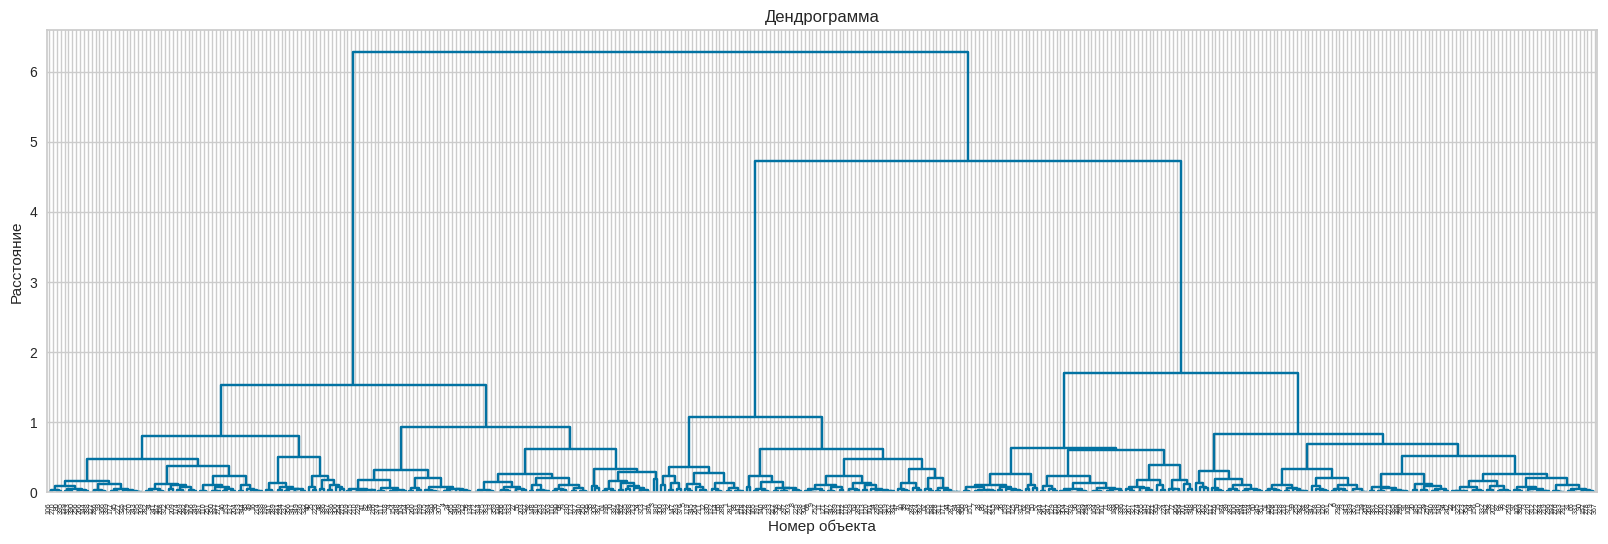

In [46]:
fig = plt.figure(figsize = (20,6))
plt.title('Дендрограмма')
plt.xlabel('Номер объекта')
plt.ylabel('Расстояние')
dendrogram(link,color_threshold = 0)
plt.show()

Построить дендрограмму с выбранным пороговым значением расстояния.


In [47]:
h = 0.7 * max(link[:,2])
h

4.393473795293515

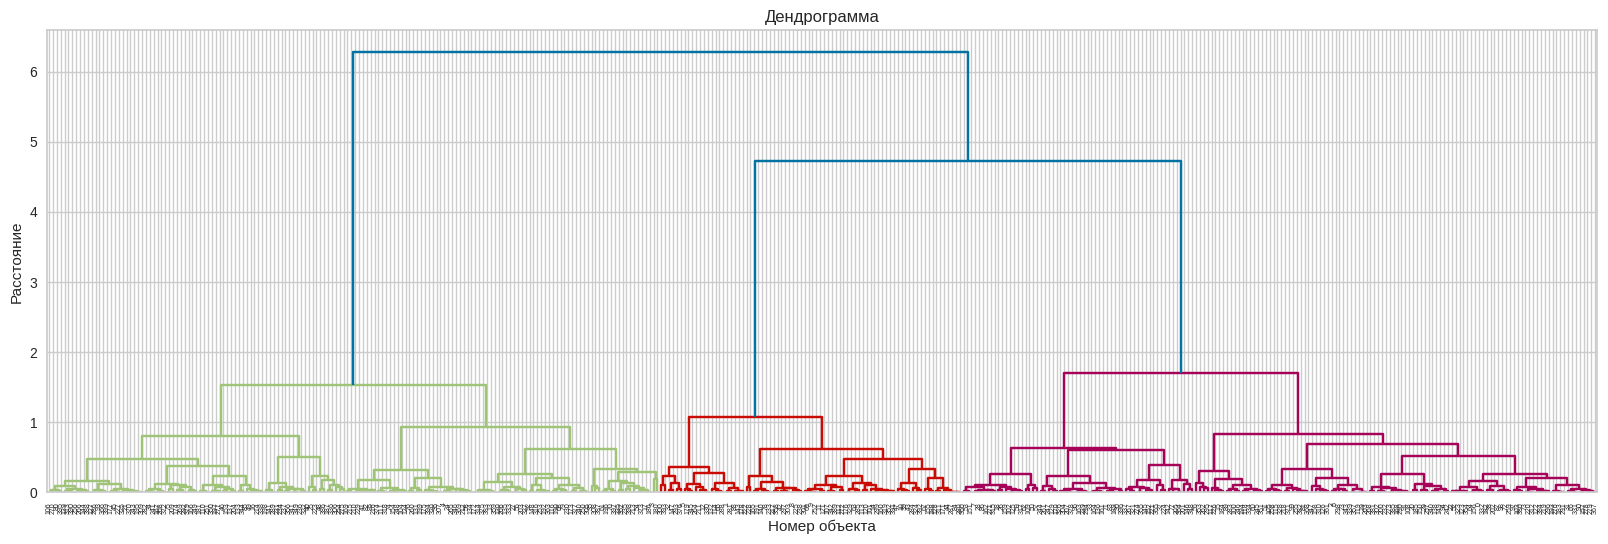

In [48]:
fig = plt.figure(figsize = (20,6))
plt.title('Дендрограмма')
plt.xlabel('Номер объекта')
plt.ylabel('Расстояние')
dendrogram(link,color_threshold = h)
plt.show()

Построить таблицу с исходными значениями признаков и номерами кластеров для каждого объекта.

In [56]:
dfc1 = df.copy()
dfc1['Кластер'] = fcluster(link, h, criterion = 'distance')
dfc1.head()

,x,y,Кластер
0,9.082147,-3.925139,3
1,-1.588040,-8.521565,2
2,5.960140,-7.272097,3
3,-0.331278,12.828355,1
4,5.805702,9.999897,1


Построить диаграмму рассеяния и отобразить цветами полученные кластеры.

In [57]:
labels = np.array(dfc1['Кластер'])

In [58]:
labels

array([3, 2, 3, 1, 1, 2, 3, 3, 2, 2, 2, 2, 2, 1, 2, 3, 1, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1, 3, 3, 2, 1, 1, 2, 2,
       2, 1, 1, 2, 1, 1, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 2, 3, 2,
       3, 2, 1, 2, 1, 3, 3, 3, 1, 1, 1, 3, 2, 1, 1, 3, 1, 3, 2, 1, 3, 3,
       2, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 1, 3, 1, 2, 3, 3,
       1, 1, 2, 2, 2, 3, 1, 3, 3, 3, 2, 2, 3, 3, 1, 3, 3, 1, 2, 3, 1, 1,
       2, 1, 1, 1, 3, 1, 3, 1, 2, 1, 3, 2, 1, 3, 3, 2, 1, 3, 3, 3, 3, 1,
       1, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 1, 1, 3, 1, 3, 2, 1, 1, 1, 1,
       2, 1, 2, 2, 1, 1, 3, 3, 3, 3, 1, 1, 2, 3, 1, 2, 1, 3, 3, 1, 1, 1,
       1, 1, 3, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 3,
       3, 3, 2, 1, 3, 2, 3, 1, 2, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2, 3, 1, 1,
       3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 2, 1, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3,
       2, 1, 1, 3, 3, 1, 1, 3, 2, 3, 3, 1, 3, 1, 3, 3, 2, 2, 1, 3, 2, 2,
       1, 2, 2, 1, 3, 3, 1, 2, 3, 3, 3, 2, 3, 2, 2,

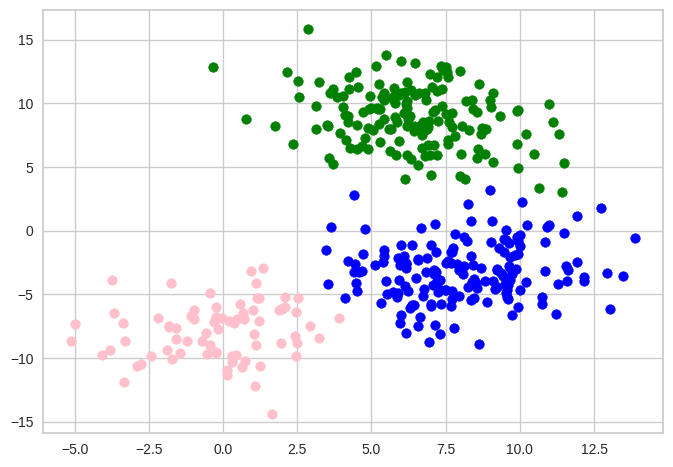

In [59]:
colors = ['red','green','pink','blue']
for i in range (len(labels)):
  plt.scatter(dfc1['x'].loc[i],
              dfc1['y'].loc[i],
              color = colors[labels[i]])

Описать полученные кластеры:
- построить таблицу, содержащую средние значения признаков в каждом кластере;
- построить диаграммы boxplot для всех признаков, раздеденных по кластерам.


In [60]:
dfc1_segm = dfc1.groupby(['Кластер']).median(numeric_only = True)
dfc1_segm

,x,y
Кластер,,
1,6.324467,8.931728
2,0.133616,-7.551757
3,7.915239,-3.270703


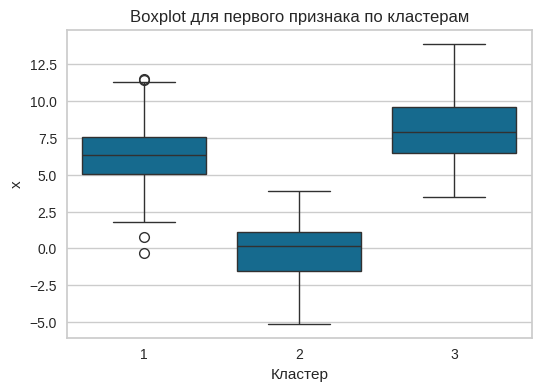

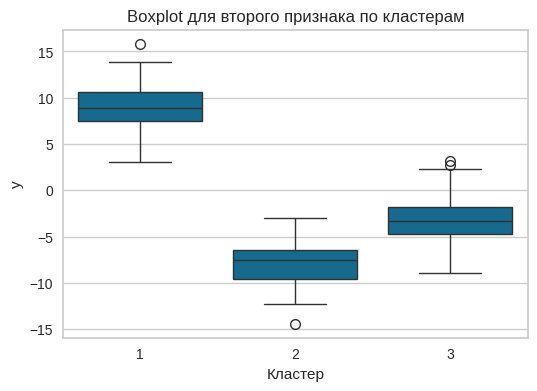

In [61]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Кластер', y=dfc1.columns[0], data=dfc1)
plt.title('Boxplot для первого признака по кластерам')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='Кластер', y=dfc1.columns[1], data=dfc1)
plt.title('Boxplot для второго признака по кластерам')
plt.show()